**IBM Z DATATHON - SMART PARKING SYSTEM**

TEAM NO - SAV58 ATTACK ON DATA

**TEAM MEMBERS**

**1.VISHAL K**

**2.LOKESHWAR R**

3.VISHNU P

**4.TAMILVANAN K L**

**5.AASHIKA R**


**6.JANANI M**

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()


Saving realistic_parking_data.csv to realistic_parking_data.csv


In [3]:
import os

In [4]:
print(os.listdir())

['.config', 'realistic_parking_data.csv', 'sample_data']


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('realistic_parking_data.csv')

In [7]:
df.head()

,hour,day_of_week,location_id,parking_lot_size,vehicles_parked,availability
0,8,0,1,100,85,False
1,9,0,1,100,95,False
2,10,0,1,100,60,True
3,12,0,2,150,110,True
4,13,0,2,150,70,True


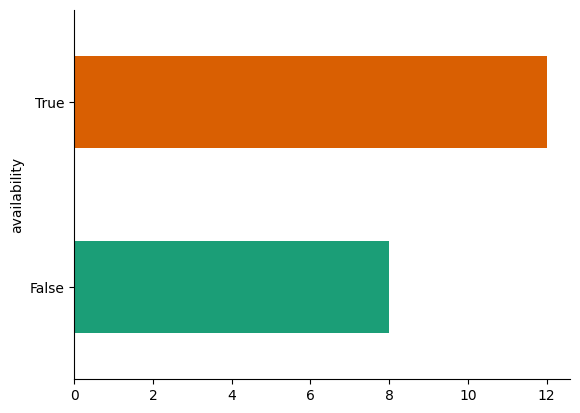

In [34]:
# @title availability

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('availability').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

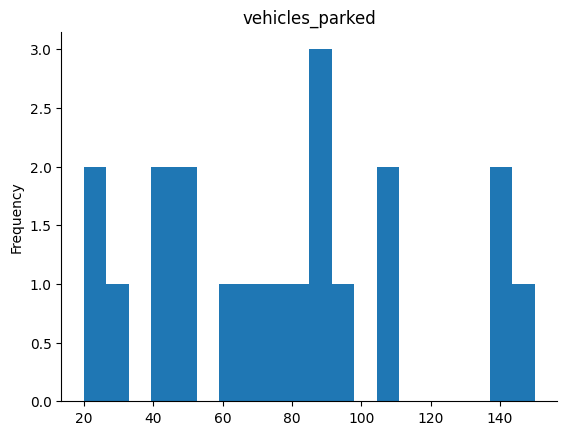

In [33]:
# @title vehicles_parked

from matplotlib import pyplot as plt
df['vehicles_parked'].plot(kind='hist', bins=20, title='vehicles_parked')
plt.gca().spines[['top', 'right',]].set_visible(False)

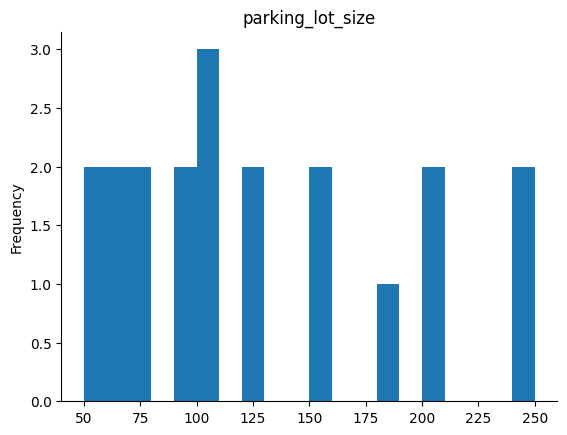

In [32]:
# @title parking_lot_size

from matplotlib import pyplot as plt
df['parking_lot_size'].plot(kind='hist', bins=20, title='parking_lot_size')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
print(df.isnull().sum())

hour                0
day_of_week         0
location_id         0
parking_lot_size    0
vehicles_parked     0
availability        0
dtype: int64


In [9]:
df.fillna(df.mean(), inplace=True)

In [10]:
df = pd.get_dummies(df, columns=['day_of_week', 'location_id'], drop_first=True)

In [11]:
X = df.drop('availability', axis=1)

In [12]:
y = df['availability']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (16, 18), Testing set: (4, 18)


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [18]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test)

In [20]:
print(y_pred[:10])

[ True  True  True  True]


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy = accuracy_score(y_test, y_pred)

In [23]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 25.00%


In [24]:
from sklearn.metrics import classification_report

In [25]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         3
        True       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)

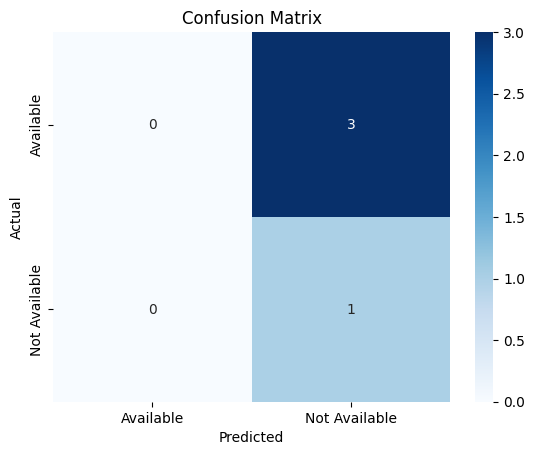

In [28]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Available', 'Not Available'], yticklabels=['Available', 'Not Available'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
import joblib
from sklearn.ensemble import RandomForestClassifier

joblib.dump(model, 'model.pkl')


['model.pkl']

In [31]:
from flask import Flask, render_template, request, jsonify
import pickle
import numpy as np
import pandas as pd

app = Flask(__name__)

model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    location = request.form['location']
    time = int(request.form['time'])
    day_of_week = request.form['day_of_week']

    X_input = np.array([[location, time, day_of_week]])

    prediction = model.predict(X_input)

    return render_template('index.html', prediction_text=f'Parking availability: {prediction[0]}')

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
